SENTIMENTAL ANALYSIS USING SENTIMENT VADER

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df= pd.read_csv('amazon_reviews_us_Electronics_preprocessed_100k.tsv',sep='\t',error_bad_lines=False )
df.dropna(inplace=True)

In [ ]:
df_review=df[['star_rating','preprocessed_review_body']]

In [ ]:
for i in range(0,len(df_review)-1):
    if type(df_review.iloc[i]['preprocessed_review_body']) != str:
        df_review.iloc[i]['preprocessed_review_body'] = str(df_review.iloc[i]['preprocessed_review_body'])

In [ ]:
df_review = df_review[df_review['star_rating'] != 3]

In [ ]:
def sentiment(n):
  if n >= 4: 
    return 1
  elif n<=2:
    return 0
df_review['sentiment'] = df_review['star_rating'].apply(sentiment)


In [ ]:
max_fatures = 5000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df_review['preprocessed_review_body'].apply(str).values)
X = tokenizer.texts_to_sequences(df_review['preprocessed_review_body'].apply(str).values)
X = pad_sequences(X)
Y = (df_review['sentiment'])

In [ ]:
rus = RandomUnderSampler(return_indices=False)
X, Y = rus.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 11132021)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(25146, 2934) (25146,)
(8382, 2934) (8382,)


In [ ]:

model = LogisticRegression()
model.fit(X_train, Y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_class = model.predict(X_test)

the accuracy score is:0.541994750656168
the recall score is:0.1632749645054425


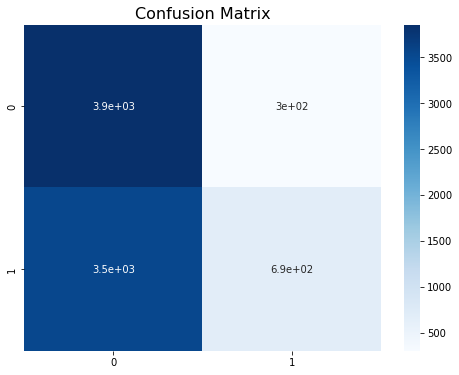

In [ ]:
import seaborn as sns
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
print("the accuracy score is:"+str(accuracy_score(Y_test, y_pred_class)))
print("the recall score is:"+str(recall_score(Y_test, y_pred_class)))
cm = confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
